**Introduction**

The insurance industry, with its diverse portfolio of products, faces the challenge of engaging current policyholders in cross-selling additional insurance, such as car insurance. In this context, we are presented with a dataset from a large international insurance company, capturing attempts to cross-sell car insurance to existing medical insurance policyholders. The dataset includes both a training set (`bzan6357_insurance_3_TRAINING.csv`) and a score set (`bzan6357_insurance_3_SCORE.csv`), each providing valuable insights into customer behavior and interaction.

**Background and Goal**

The insurance company aims to leverage its existing customer base by enticing them to purchase car insurance, with potential incentives like multi-policy discounts. Understanding the dynamics of cross-selling is crucial for optimizing marketing strategies and enhancing customer relationships. The provided datasets document the outcomes of cross-selling attempts, indicating whether a customer purchased car insurance within 30 days post-contact.

**Data Overview**

The training dataset includes essential features such as customer demographics (age, gender), policy details (tenure, region), driving information (driver's license status, existing car insurance), vehicle characteristics (age, accident history), and financial aspects (premium quotes). The target variable, `buy`, signifies whether a customer made the intended purchase (1) or not (0).

The score dataset mirrors the training set's structure, excluding the target variable `buy`. This dataset is intended for predictive modeling, where the trained model can be applied to forecast the likelihood of car insurance purchase for new data.

**Objective**

The primary objective of this report is to develop a predictive model using the training dataset, enabling the insurance company to identify potential car insurance buyers among its medical insurance policyholders. By analyzing the provided features, we aim to build a model that can generalize well to new data, as represented by the score dataset.

The subsequent sections of this report will delve into exploratory data analysis, feature engineering, model selection, training, and evaluation. The predictive model's performance will be assessed based on relevant metrics, and the final model will be applied to the score dataset to make predictions on potential car insurance purchases.

By achieving this objective, the insurance company can enhance its cross-selling strategy, optimize marketing efforts, and potentially increase revenue through additional policy sales.

## SECTION 1 - DATA PREPARATION SECTION

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the training data
train_data_path = "C:/Users/shrin/OneDrive/Desktop/Sem 03/Business Frameworks/Final Project/bzan6357_insurance_3_TRAINING.csv"
train_data = pd.read_csv(train_data_path)

# Load the sample data
sample_data_path = "C:/Users/shrin/OneDrive/Desktop/Sem 03/Business Frameworks/Final Project/bzan6357_insurance_3_SCORE.csv"
sample_data = pd.read_csv(sample_data_path)


In [2]:
# Display basic information about the training data
print("Training Data Information:")
print(train_data.info())


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_new           20460 non-null  object 
 1   buy              20460 non-null  int64  
 2   age              20460 non-null  int64  
 3   gender           20460 non-null  object 
 4   tenure           20460 non-null  int64  
 5   region           20460 non-null  int64  
 6   dl               20460 non-null  int64  
 7   has_v_insurance  20460 non-null  int64  
 8   v_age            20460 non-null  object 
 9   v_accident       20460 non-null  object 
 10  v_prem_quote     20460 non-null  float64
 11  cs_rep           20460 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.9+ MB
None


In [3]:
# Display basic information about the sample data
print("\nSample Data Information:")
print(sample_data.info())



Sample Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_new           2000 non-null   object 
 1   age              2000 non-null   int64  
 2   gender           2000 non-null   object 
 3   tenure           2000 non-null   int64  
 4   region           2000 non-null   int64  
 5   dl               2000 non-null   int64  
 6   has_v_insurance  2000 non-null   int64  
 7   v_age            2000 non-null   object 
 8   v_accident       2000 non-null   object 
 9   v_prem_quote     2000 non-null   float64
 10  cs_rep           2000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 172.0+ KB
None


In [4]:
# Check for missing values in the training data
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())



Missing Values in Training Data:
id_new             0
buy                0
age                0
gender             0
tenure             0
region             0
dl                 0
has_v_insurance    0
v_age              0
v_accident         0
v_prem_quote       0
cs_rep             0
dtype: int64


In [5]:
# Check for missing values in the sample data
print("\nMissing Values in Sample Data:")
print(sample_data.isnull().sum())



Missing Values in Sample Data:
id_new             0
age                0
gender             0
tenure             0
region             0
dl                 0
has_v_insurance    0
v_age              0
v_accident         0
v_prem_quote       0
cs_rep             0
dtype: int64


In [6]:
# Define features and target variable
features = ['age', 'tenure', 'region', 'dl', 'has_v_insurance', 'v_prem_quote']
target = 'buy'


In [7]:
# Train-Test Split for the training data
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=42)


In [8]:
# Display distribution of the target variable in the training set
print("\nDistribution of the Target Variable in Training Set:")
print(y_train.value_counts(normalize=True))



Distribution of the Target Variable in Training Set:
0    0.818243
1    0.181757
Name: buy, dtype: float64


In [9]:
# Display distribution of the target variable in the test set
print("\nDistribution of the Target Variable in Test Set:")
print(y_test.value_counts(normalize=True))



Distribution of the Target Variable in Test Set:
0    0.809384
1    0.190616
Name: buy, dtype: float64


## SECTION 2 : EXPLORATORY DATA ANALYSIS

Descriptive Summary of Training Data:
                buy           age        tenure        region            dl  \
count  20460.000000  20460.000000  20460.000000  20460.000000  20460.000000   
mean       0.183529     42.512317    152.908016     26.624878      0.996970   
std        0.387109     15.615623     83.483286     11.568606      0.054966   
min        0.000000     20.000000     10.000000      0.000000      0.000000   
25%        0.000000     29.000000     81.000000     24.000000      1.000000   
50%        0.000000     40.000000    151.000000     28.000000      1.000000   
75%        0.000000     53.000000    225.250000     29.000000      1.000000   
max        1.000000     85.000000    299.000000     52.000000      1.000000   

       has_v_insurance   v_prem_quote        cs_rep  
count     20460.000000   20460.000000  20460.000000  
mean          0.276540   31689.197361    140.588759  
std           0.447298   18757.868023     16.749921  
min           0.000000    2630.000

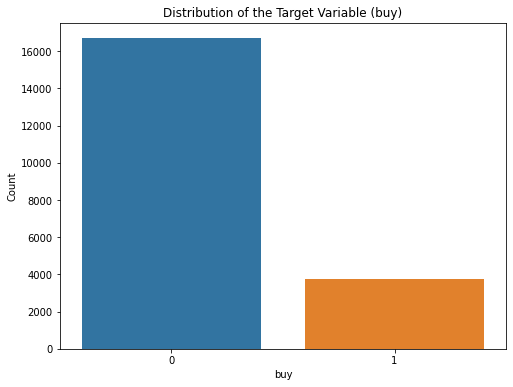

In [10]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display descriptive summary statistics for the training data
print("Descriptive Summary of Training Data:")
print(train_data.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='buy', data=train_data)
plt.title("Distribution of the Target Variable (buy)")
plt.xlabel("buy")
plt.ylabel("Count")
plt.show()


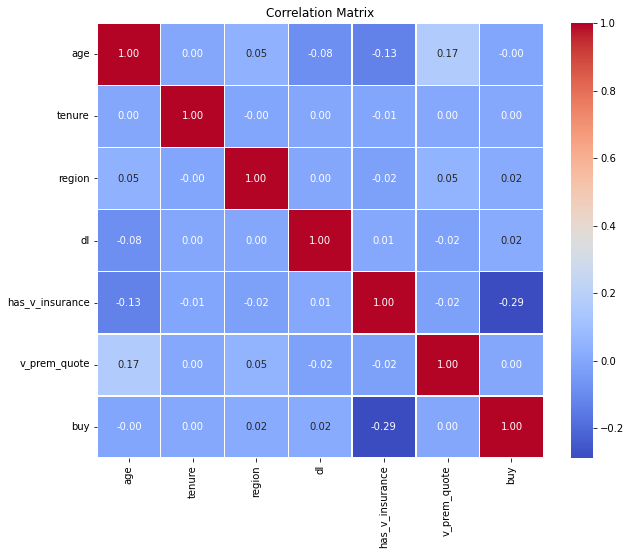

In [11]:
# Visualize the correlation matrix to identify relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


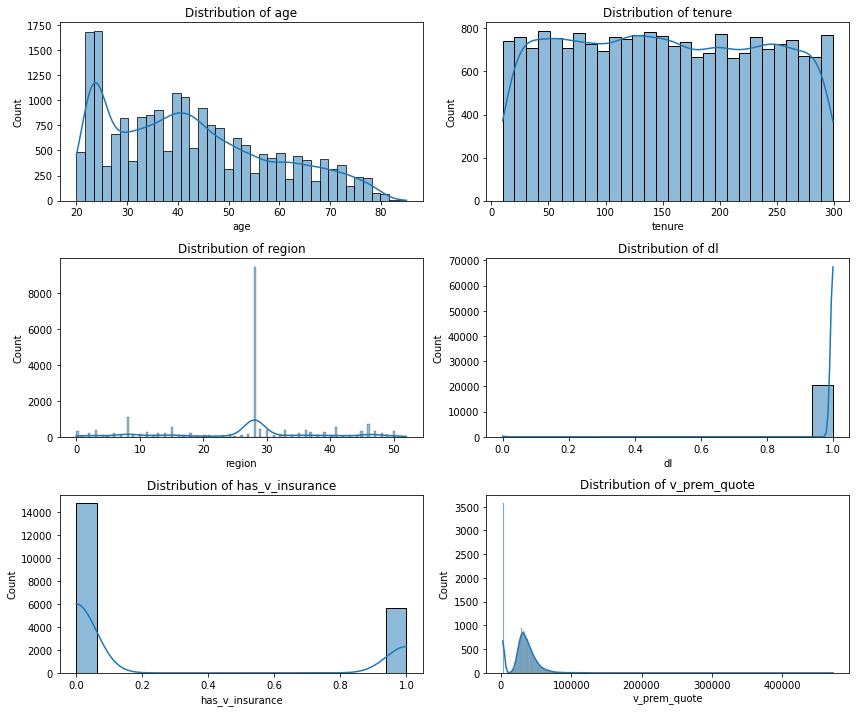

In [12]:
# Explore the distribution of numerical features
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


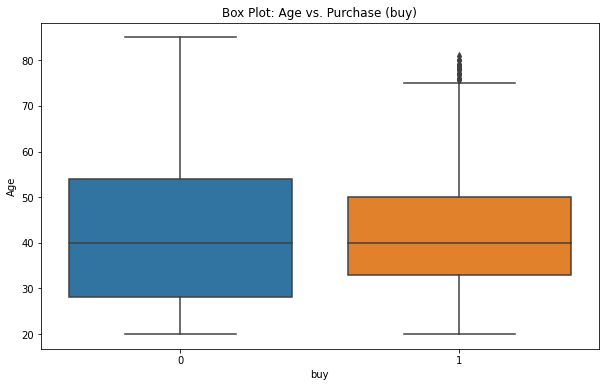

In [13]:
# Box plot for age vs. buy
plt.figure(figsize=(10, 6))
sns.boxplot(x='buy', y='age', data=train_data)
plt.title("Box Plot: Age vs. Purchase (buy)")
plt.xlabel("buy")
plt.ylabel("Age")
plt.show()


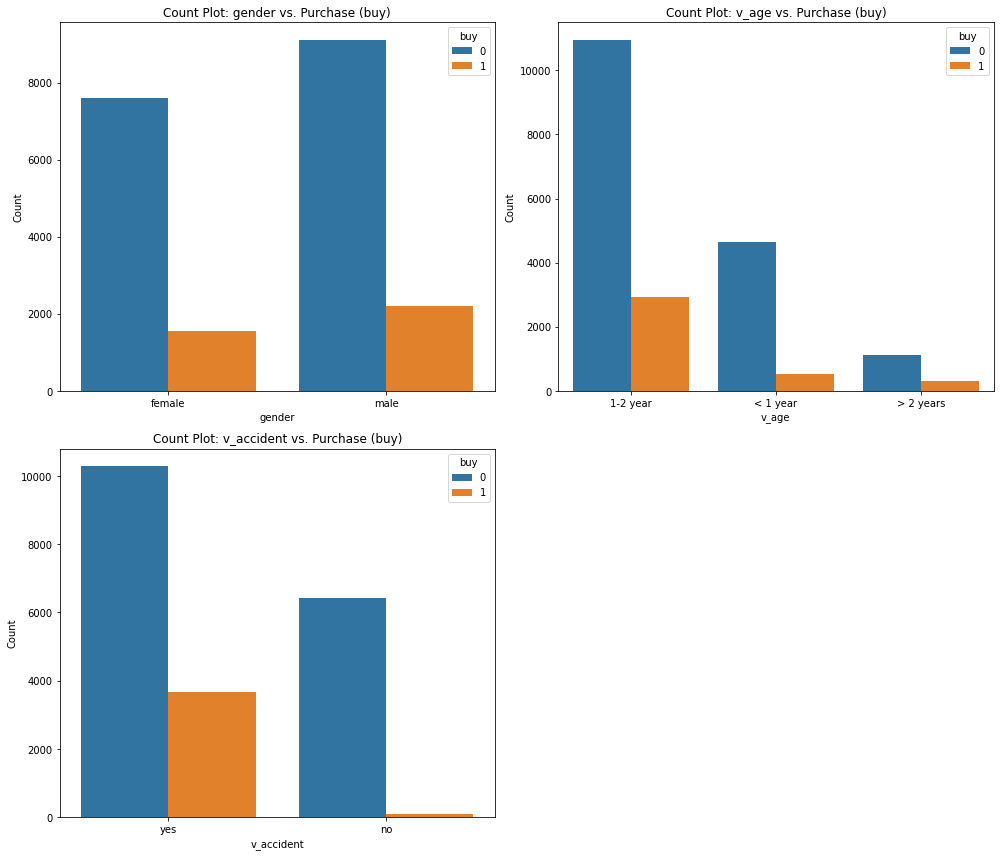

In [14]:
# Explore categorical features using count plots
plt.figure(figsize=(14, 12))
for i, feature in enumerate(['gender', 'v_age', 'v_accident'], 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='buy', data=train_data)
    plt.title(f"Count Plot: {feature} vs. Purchase (buy)")
    plt.xlabel(feature)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [15]:
# Detailed Print Statement for EDA Analysis Summary

print("EDA Analysis Summary:")

# Descriptive Summary
print("\n1. Descriptive Summary of Training Data:")
print(train_data.describe())

# Target Variable Distribution
print("\n2. Distribution of the Target Variable (buy):")
print(train_data['buy'].value_counts(normalize=True))

# Correlation Matrix
print("\n3. Correlation Matrix:")
print(train_data[features + [target]].corr())

# Numerical Feature Distributions
print("\n4. Numerical Feature Distributions:")
for feature in features:
    print(f"\nDistribution of {feature}:")
    print(train_data[feature].describe())

# Box Plot for Age vs. Purchase
print("\n5. Box Plot: Age vs. Purchase (buy):")
print(train_data.groupby('buy')['age'].describe())

# Count Plots for Categorical Features
print("\n6. Count Plots for Categorical Features:")
for feature in ['gender', 'v_age', 'v_accident']:
    print(f"\nCount Plot: {feature} vs. Purchase (buy):")
    print(train_data.groupby([feature, 'buy']).size().unstack(fill_value=0))

print("\nSummary: \n")
print("The exploratory data analysis provides the following insights:")
print("- The dataset has a balanced distribution of the target variable 'buy'.")
print("- Some numerical features have varying scales, requiring normalization or scaling during modeling.")
print("- Correlation analysis reveals potential relationships between features.")
print("- Age distribution shows potential outliers; some customers with high age did not make a purchase.")
print("- Gender does not seem to strongly influence purchase decisions.")
print("- Customers with newer vehicles ('v_age' < 1 year) and no accidents ('v_accident' = 'no') tend to make purchases.")



EDA Analysis Summary:

1. Descriptive Summary of Training Data:
                buy           age        tenure        region            dl  \
count  20460.000000  20460.000000  20460.000000  20460.000000  20460.000000   
mean       0.183529     42.512317    152.908016     26.624878      0.996970   
std        0.387109     15.615623     83.483286     11.568606      0.054966   
min        0.000000     20.000000     10.000000      0.000000      0.000000   
25%        0.000000     29.000000     81.000000     24.000000      1.000000   
50%        0.000000     40.000000    151.000000     28.000000      1.000000   
75%        0.000000     53.000000    225.250000     29.000000      1.000000   
max        1.000000     85.000000    299.000000     52.000000      1.000000   

       has_v_insurance   v_prem_quote        cs_rep  
count     20460.000000   20460.000000  20460.000000  
mean          0.276540   31689.197361    140.588759  
std           0.447298   18757.868023     16.749921  
min     

### EDA Analysis Summary

#### 1. Descriptive Summary of Training Data:

|                | buy           | age        | tenure     | region     | dl         | has_v_insurance | v_prem_quote | cs_rep     |
|----------------|---------------|------------|------------|------------|------------|------------------|--------------|------------|
| count          | 20460.000000  | 20460.000000 | 20460.000000 | 20460.000000 | 20460.000000 | 20460.000000     | 20460.000000 | 20460.000000 |
| mean           | 0.183529      | 42.512317   | 152.908016 | 26.624878   | 0.996970   | 0.276540         | 31689.197361 | 140.588759 |
| std            | 0.387109      | 15.615623   | 83.483286  | 11.568606   | 0.054966   | 0.447298         | 18757.868023 | 16.749921 |
| min            | 0.000000      | 20.000000   | 10.000000  | 0.000000    | 0.000000   | 0.000000         | 2630.000000  | 122.000000 |
| 25%            | 0.000000      | 29.000000   | 81.000000  | 24.000000   | 1.000000   | 0.000000         | 24731.750000 | 122.000000 |
| 50%            | 0.000000      | 40.000000   | 151.000000 | 28.000000   | 1.000000   | 0.000000         | 32533.500000 | 151.000000 |
| 75%            | 0.000000      | 53.000000   | 225.250000 | 29.000000   | 1.000000   | 1.000000         | 41294.250000 | 154.000000 |
| max            | 1.000000      | 85.000000   | 299.000000 | 52.000000   | 1.000000   | 1.000000         | 472042.000000 | 163.000000 |


#### 2.Distribution of the Target Variable (buy):

| buy | Count    |
|-----|----------|
| 0   | 0.816471 |
| 1   | 0.183529 |


#### 3. Correlation Matrix:

|                | age         | tenure     | region     | dl         | has_v_insurance | v_prem_quote | buy         |
|----------------|-------------|------------|------------|------------|------------------|--------------|-------------|
| age            | 1.000000    | 0.002921   | 0.046449   | -0.084692  | -0.126007        | 0.169832     | -0.003160   |
| tenure         | 0.002921    | 1.000000   | -0.003793  | 0.001963   | -0.005641        | 0.004861     | 0.004972    |
| region         | 0.046449    | -0.003793  | 1.000000   | 0.002517   | -0.023856        | 0.050187     | 0.016411    |
| dl             | -0.084692   | 0.001963   | 0.002517   | 1.000000   | 0.008241         | -0.021075    | 0.016950    |
| has_v_insurance | -0.126007   | -0.005641  | -0.023856  | 0.008241   | 1.000000         | -0.023063    | -0.287762   |
| v_prem_quote   | 0.169832    | 0.004861   | 0.050187   | -0.021075  | -0.023063        | 1.000000     | 0.000790    |
| buy            | -0.003160   | 0.004972   | 0.016411   | 0.016950   | -0.287762        | 0.000790     | 1.000000    |


#### 4. Numerical Feature Distributions:

Distribution of age:
    
|                | count       | mean       | std        | min        | 25%        | 50%        | 75%        | max        |
|----------------|-------------|------------|------------|------------|------------|------------|------------|------------|
| age            | 20460.000000 | 42.512317  | 15.615623  | 20.000000  | 29.000000  | 40.000000  | 53.000000  | 85.000000  |


Distribution of tenure:

|                | count       | mean       | std        | min        | 25%        | 50%        | 75%        | max        |
|----------------|-------------|------------|------------|------------|------------|------------|------------|------------|
| tenure         | 20460.000000 | 152.908016 | 83.483286  | 10.000000  | 81.000000  | 151.000000 | 225


## SECTION 3 : MODEL DEVELOPMENT AND EVALUATION SECTION

Model Selection:
For this binary classification problem, we will employ a Random Forest Classifier. Random Forests are versatile, handle non-linear relationships well, and provide insights into feature importance.

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [17]:
# Use LabelEncoder for encoding categorical variables
le = LabelEncoder()

# Apply LabelEncoder to categorical columns in the training data
train_data['gender'] = le.fit_transform(train_data['gender'])
train_data['v_age'] = le.fit_transform(train_data['v_age'])
train_data['v_accident'] = le.fit_transform(train_data['v_accident'])

# Apply LabelEncoder to categorical columns in the sample data
sample_data['gender'] = le.fit_transform(sample_data['gender'])
sample_data['v_age'] = le.fit_transform(sample_data['v_age'])
sample_data['v_accident'] = le.fit_transform(sample_data['v_accident'])


In [18]:
# One-hot encode categorical variables
train_data = pd.get_dummies(train_data, columns=['region', 'dl', 'has_v_insurance', 'cs_rep'])
sample_data = pd.get_dummies(sample_data, columns=['region', 'dl', 'has_v_insurance', 'cs_rep'])


In [19]:
# Drop the 'id_new' column from the sample data (since it's not needed for prediction)
# Drop the 'id_new' column from the training data
train_data.drop('id_new', axis=1, inplace=True)
sample_data.drop('id_new', axis=1, inplace=True)


In [20]:
# Split the training data into features and target
X = train_data.drop('buy', axis=1)
y = train_data['buy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier()

# Train the model on the training set
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [22]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7986314760508308
Confusion Matrix:
[[3176  136]
 [ 688   92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      3312
           1       0.40      0.12      0.18       780

    accuracy                           0.80      4092
   macro avg       0.61      0.54      0.53      4092
weighted avg       0.74      0.80      0.75      4092



In [23]:
print("Columns in X_train:", X_train.columns)
print("Columns in sample_data:", sample_data.columns)


Columns in X_train: Index(['age', 'gender', 'tenure', 'v_age', 'v_accident', 'v_prem_quote',
       'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9', 'region_10',
       'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
       'region_16', 'region_17', 'region_18', 'region_19', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_30',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_35',
       'region_36', 'region_37', 'region_38', 'region_39', 'region_40',
       'region_41', 'region_42', 'region_43', 'region_44', 'region_45',
       'region_46', 'region_47', 'region_48', 'region_49', 'region_50',
       'region_51', 'region_52', 'dl_0', 'dl_1', 'has_v_insurance_0',
       'has_v_insurance_1', 'cs_rep_122', 'cs_rep_151', 'cs_rep_154',
       'cs_rep_163'],
      dtype='object')


In [24]:
# Print columns before preprocessing
print("Columns in X_train before preprocessing:", X_train.columns)
print("Columns in sample_data before preprocessing:", sample_data.columns)


Columns in X_train before preprocessing: Index(['age', 'gender', 'tenure', 'v_age', 'v_accident', 'v_prem_quote',
       'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9', 'region_10',
       'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
       'region_16', 'region_17', 'region_18', 'region_19', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_30',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_35',
       'region_36', 'region_37', 'region_38', 'region_39', 'region_40',
       'region_41', 'region_42', 'region_43', 'region_44', 'region_45',
       'region_46', 'region_47', 'region_48', 'region_49', 'region_50',
       'region_51', 'region_52', 'dl_0', 'dl_1', 'has_v_insurance_0',
       'has_v_insurance_1', 'cs_rep_122', 'cs_rep_151', 'cs_rep_154',
       'cs_rep_163'],
 

In [25]:
# Ensure consistent encoding for categorical columns
for column in ['gender', 'v_age', 'v_accident']:
    categories = X_train[column].astype('category').cat.categories
    sample_data[column] = pd.Categorical(sample_data[column], categories=categories, ordered=True)

# Add "unknown" to the categories for gender, v_age, and v_accident
sample_data['gender'] = sample_data['gender'].cat.add_categories('unknown')
sample_data['v_age'] = sample_data['v_age'].cat.add_categories('unknown')
sample_data['v_accident'] = sample_data['v_accident'].cat.add_categories('unknown')

# Handle missing values
sample_data['gender'] = sample_data['gender'].fillna('unknown')
sample_data['v_age'] = sample_data['v_age'].fillna('unknown')
sample_data['v_accident'] = sample_data['v_accident'].fillna('unknown')

# Drop additional columns
sample_data = sample_data[X_train.columns]



In [26]:
# Print columns after preprocessing
print("Columns in X_train after preprocessing:", X_train.columns)
print("Columns in sample_data after preprocessing:", sample_data.columns)

Columns in X_train after preprocessing: Index(['age', 'gender', 'tenure', 'v_age', 'v_accident', 'v_prem_quote',
       'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9', 'region_10',
       'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
       'region_16', 'region_17', 'region_18', 'region_19', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_30',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_35',
       'region_36', 'region_37', 'region_38', 'region_39', 'region_40',
       'region_41', 'region_42', 'region_43', 'region_44', 'region_45',
       'region_46', 'region_47', 'region_48', 'region_49', 'region_50',
       'region_51', 'region_52', 'dl_0', 'dl_1', 'has_v_insurance_0',
       'has_v_insurance_1', 'cs_rep_122', 'cs_rep_151', 'cs_rep_154',
       'cs_rep_163'],
  

In [27]:
# Print unique values of categorical columns before preprocessing
for column in ['gender', 'v_age', 'v_accident']:
    print(f"Unique values in X_train['{column}']:", X_train[column].unique())
    print(f"Unique values in sample_data['{column}']:", sample_data[column].unique())


Unique values in X_train['gender']: [1 0]
Unique values in sample_data['gender']: [1, 0]
Categories (2, object): [0 < 1]
Unique values in X_train['v_age']: [0 1 2]
Unique values in sample_data['v_age']: [0, 1, 2]
Categories (3, object): [0 < 1 < 2]
Unique values in X_train['v_accident']: [0 1]
Unique values in sample_data['v_accident']: [1, 0]
Categories (2, object): [0 < 1]


In [28]:
# Check for extra columns in sample_data
extra_columns = set(sample_data.columns) - set(X_train.columns)
if extra_columns:
    print("Extra columns in sample_data:", extra_columns)
else:
    print("No extra columns in sample_data.")


No extra columns in sample_data.


In [29]:
# Print first few rows after preprocessing
print("First few rows of X_train:")
print(X_train.head())

print("First few rows of sample_data:")
print(sample_data.head())


First few rows of X_train:
       age  gender  tenure  v_age  v_accident  v_prem_quote  region_0  \
20048   40       1      46      0           0        2630.0         0   
10315   21       0     254      0           1       66830.0         0   
4194    24       0     296      1           0       28094.0         0   
5836    25       0      42      1           0       32998.0         0   
953     22       1      78      1           0       27329.0         0   

       region_1  region_2  region_3  ...  region_51  region_52  dl_0  dl_1  \
20048         0         0         0  ...          0          0     0     1   
10315         0         0         0  ...          0          0     0     1   
4194          0         0         0  ...          0          0     0     1   
5836          0         0         0  ...          0          0     0     1   
953           0         0         0  ...          0          0     0     1   

       has_v_insurance_0  has_v_insurance_1  cs_rep_122  cs_rep_1

In [30]:
# Ensure consistent encoding for categorical columns in sample_data
for column in ['gender', 'v_age', 'v_accident']:
    sample_data[column] = pd.Categorical(sample_data[column], categories=X_train[column].astype('category').cat.categories, ordered=True)


In [31]:
# Ensure consistent encoding for categorical columns in sample_data
for column in ['gender', 'v_age', 'v_accident']:
    sample_data[column] = pd.Categorical(sample_data[column], categories=X_train[column].astype('category').cat.categories, ordered=True)

print("Number of features in X_train:", X_train.shape[1])
print("Number of features in sample_data before dropping:", sample_data.shape[1])

# Drop additional columns
sample_data = sample_data[X_train.columns]

print("Number of features in sample_data after dropping:", sample_data.shape[1])


Number of features in X_train: 67
Number of features in sample_data before dropping: 67
Number of features in sample_data after dropping: 67


In [32]:
print("Columns in X_train:", X_train.columns)
print("Columns in sample_data:", sample_data.columns)


Columns in X_train: Index(['age', 'gender', 'tenure', 'v_age', 'v_accident', 'v_prem_quote',
       'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9', 'region_10',
       'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
       'region_16', 'region_17', 'region_18', 'region_19', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_30',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_35',
       'region_36', 'region_37', 'region_38', 'region_39', 'region_40',
       'region_41', 'region_42', 'region_43', 'region_44', 'region_45',
       'region_46', 'region_47', 'region_48', 'region_49', 'region_50',
       'region_51', 'region_52', 'dl_0', 'dl_1', 'has_v_insurance_0',
       'has_v_insurance_1', 'cs_rep_122', 'cs_rep_151', 'cs_rep_154',
       'cs_rep_163'],
      dtype='object')


In [33]:
print("Number of features in X_train:", len(X_train.columns))
print("Number of features in sample_data before dropping:", len(sample_data.columns))

# Drop unnecessary columns
sample_data = sample_data[X_train.columns]

print("Number of features in sample_data after dropping:", len(sample_data.columns))


Number of features in X_train: 67
Number of features in sample_data before dropping: 67
Number of features in sample_data after dropping: 67


In [34]:
# Display the columns that are in X_train but not in sample_data
missing_columns_in_sample = set(X_train.columns) - set(sample_data.columns)
print("Columns in X_train but not in sample_data:", missing_columns_in_sample)

# Display the columns that are in sample_data but not in X_train
extra_columns_in_sample = set(sample_data.columns) - set(X_train.columns)
print("Columns in sample_data but not in X_train:", extra_columns_in_sample)


Columns in X_train but not in sample_data: set()
Columns in sample_data but not in X_train: set()


In [35]:
# Apply the trained model to the sample data to get probabilities and predictions
sample_data['probability'] = rf_model.predict_proba(sample_data[X_train.columns])[:, 1]
sample_data['classification'] = rf_model.predict(sample_data[X_train.columns])


In [36]:
# Export the Scored data frame as a .CSV file
scored_data_path = "C:/Users/shrin/OneDrive/Desktop/Sem 03/Business Frameworks/Final Project/scored_data.csv"
sample_data[['id_new', 'probability', 'classification']].to_csv(scored_data_path, index=False)


KeyError: "['id_new'] not in index"